# **IMPORT DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_description.txt to data_description.txt
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


# **IMPORT LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


# **Load Dataset**

In [4]:
# Load training data
df = pd.read_csv("train.csv")

# View structure
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

# **Select Relevant Features**

In [5]:
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].copy()

# Handle missing values
data.dropna(inplace=True)
print("Data cleaned. Shape:", data.shape)


Data cleaned. Shape: (1460, 4)


# **Data Understanding & Visualization**

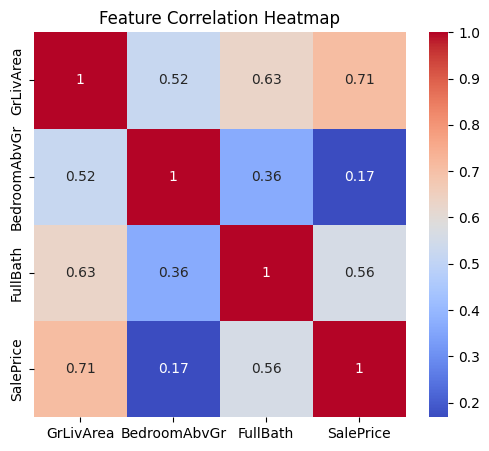

In [6]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Split Data for Training & Testing**

In [7]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Feature scaling (optional but helps performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# **Train the Linear Regression Model**

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Model details
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(['GrLivArea', 'BedroomAbvGr', 'FullBath'], model.coef_)))


Intercept: 180478.9252425382
Coefficients: [('GrLivArea', np.float64(54645.06001440578)), ('BedroomAbvGr', np.float64(-21737.250571366367)), ('FullBath', np.float64(16529.701650461866))]


# **Evaluate Model Performance**

In [9]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.634
RMSE: 52975.72


# **Visualization: Actual vs Predicted**

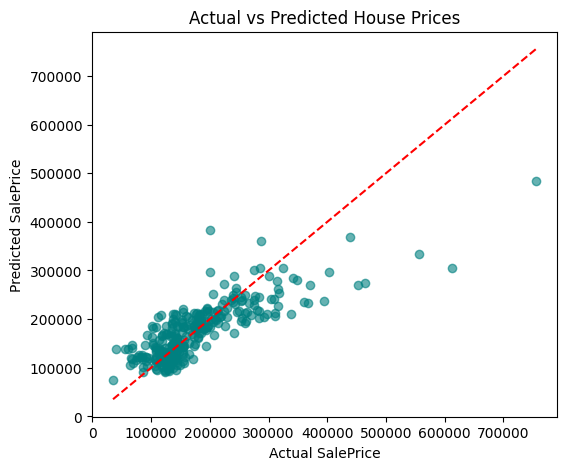

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.show()


# **Predict on test.csv (Final Submission)**

In [11]:
# Load test dataset
test_data = pd.read_csv("test.csv")

# Fill missing values
test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']] = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']].fillna(0)

# Apply same scaling
X_test_final = scaler.transform(test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']])

# Predict sale prices
test_data['SalePrice'] = model.predict(X_test_final)

# Save to submission file
submission = test_data[['Id', 'SalePrice']]
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file generated successfully!")


✅ submission.csv file generated successfully!


# **Business Insight**

In [12]:
print("""
💡 BUSINESS INSIGHT:
- House price increases significantly with living area (GrLivArea).
- Bedrooms and bathrooms also raise price but less strongly.
- This model can help agents estimate market value quickly.
""")



💡 BUSINESS INSIGHT:
- House price increases significantly with living area (GrLivArea).
- Bedrooms and bathrooms also raise price but less strongly.
- This model can help agents estimate market value quickly.

